In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import ShuffleSplit,KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import accuracy_score as accuracy, precision_score as precision, recall_score as recall, f1_score as f1
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from scipy import stats
from tqdm import tqdm
import timeit                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ibelaya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Загрузить данные

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
# Провести описательный анализ предложенных данных

In [5]:
train.head(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5,13,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,14,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
7,18,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
8,20,2,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0
9,23,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000,0


In [6]:
train.info(verbose = True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 371 columns):
ID                               76020 non-null int64
var3                             76020 non-null int64
var15                            76020 non-null int64
imp_ent_var16_ult1               76020 non-null float64
imp_op_var39_comer_ult1          76020 non-null float64
imp_op_var39_comer_ult3          76020 non-null float64
imp_op_var40_comer_ult1          76020 non-null float64
imp_op_var40_comer_ult3          76020 non-null float64
imp_op_var40_efect_ult1          76020 non-null float64
imp_op_var40_efect_ult3          76020 non-null float64
imp_op_var40_ult1                76020 non-null float64
imp_op_var41_comer_ult1          76020 non-null float64
imp_op_var41_comer_ult3          76020 non-null float64
imp_op_var41_efect_ult1          76020 non-null float64
imp_op_var41_efect_ult3          76020 non-null float64
imp_op_var41_ult1                76020 non-null float64


In [7]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [8]:
train1 = pd.DataFrame(train.TARGET.value_counts())
train1['Percentage'] = 100*train1['TARGET']/train.shape[0]
train1

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


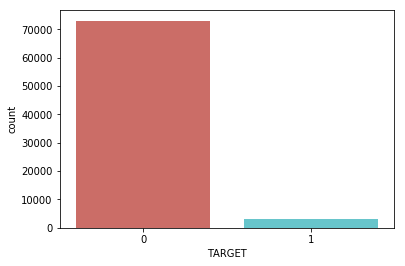

In [9]:
sns.countplot(x='TARGET', data=train, palette='hls')

In [10]:
# Провести анализ корреляции переменных, отобразить взаимосвязи между переменными

In [11]:
#Основные признаки:
num_var4 - number of bank products
var3 -  nationality of the customer
var15 - age of the customer
var38 - mortgage value (?)

SyntaxError: invalid syntax (<ipython-input-11-a60076d35523>, line 2)

In [11]:
# Распределение клиентов по количеству продуктов

In [12]:
train['num_var4'].value_counts()

1    38147
0    19528
2    12692
3     4377
4     1031
5      203
6       36
7        6
Name: num_var4, dtype: int64

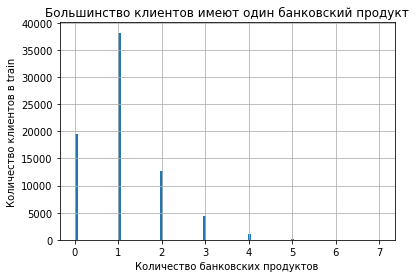

In [13]:
train.num_var4.hist(bins=100)
plt.xlabel('Количество банковских продуктов')
plt.ylabel('Количество клиентов в train')
plt.title('Большинство клиентов имеют один банковский продукт')
plt.show()

In [14]:
# Распределение клиентов по возрасту

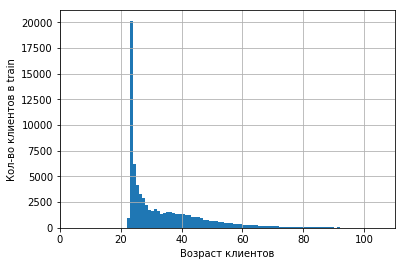

In [15]:
train.var15.hist(bins=100)
plt.xlabel('Возраст клиентов')
plt.ylabel('Кол-во клиентов в train')
plt.show()

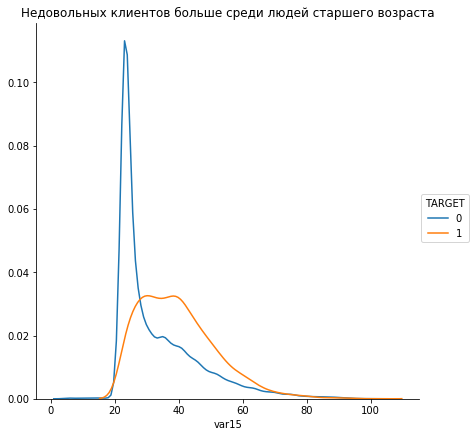

In [16]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend()
plt.title('Недовольных клиентов больше среди людей старшего возраста');

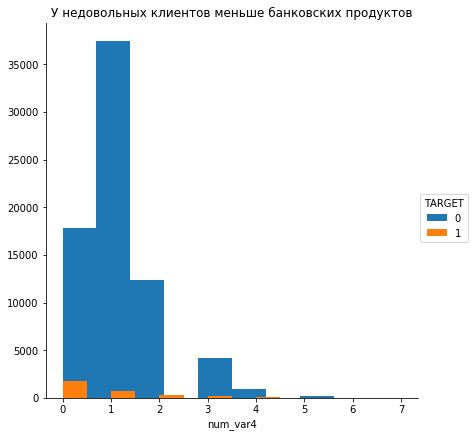

In [17]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(plt.hist, "num_var4") \
   .add_legend()
plt.title('У недовольных клиентов меньше банковских продуктов')
plt.show()

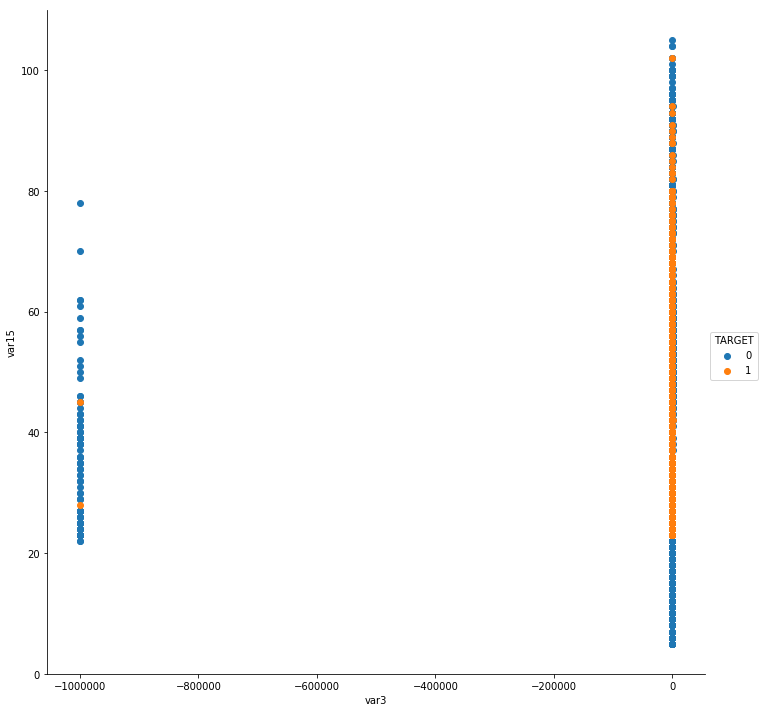

In [18]:
sns.FacetGrid(train, hue="TARGET", size=10) \
   .map(plt.scatter, "var3", "var15") \
   .add_legend();

In [19]:
# Шкалировать данные несколькими способами (нормализация, стандартизация). Какой подход лучше?

In [20]:
X= train.drop(['TARGET', 'ID'], axis= 1)
y = train.TARGET
col = X.columns

In [21]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
X_scaled = pd.DataFrame(scaler.transform(X), columns = col)

In [23]:
X_norm = pd.DataFrame(MinMaxScaler().fit_transform(X), columns = col)

In [24]:
# Выбираем лучший способ с помощью дерева решений

In [25]:
num_folds = 10
seed = 7

In [26]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [27]:
dtc = DecisionTreeClassifier()
results = cross_val_score(dtc, X_scaled, y, cv=kfold, n_jobs=4)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 92.908% (0.416%)


In [28]:
results1 = cross_val_score(dtc, X_norm, y, cv=kfold, n_jobs=4)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 92.908% (0.416%)


In [29]:
# Точность одинаковая 

In [30]:
# Попробовать стратегию oversamling и сравнить ее с неизмененной моделью

In [31]:
train1 = pd.concat([y,X_norm],axis=1)

In [32]:
max_size = train1['TARGET'].value_counts().max()

In [33]:
lst = [train1]
for class_index, group in train1.groupby('TARGET'):
    lst.append(group.sample(max_size-len(group), replace=True))
train_over = pd.concat(lst)

Random over-sampling:
1    73012
0    73012
Name: TARGET, dtype: int64


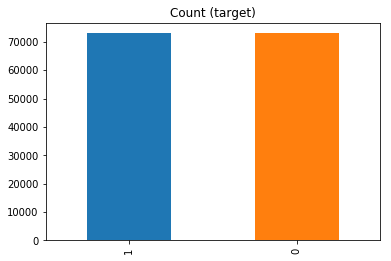

In [34]:
print('Random over-sampling:')
print(train_over.TARGET.value_counts())

train_over.TARGET.value_counts().plot(kind='bar', title='Count (target)');

In [35]:
y_over = train_over.TARGET
X_norm_over = train_over.drop('TARGET', axis = 1)

In [36]:
results = cross_val_score(dtc, X_norm_over, y_over, cv=kfold, n_jobs=4)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 96.381% (2.239%)


In [37]:
# Результат с использованием oversamling получился точнее

In [38]:
# Попробовать стратегию undersampling и сравнить ее с неизмененной моделью

In [39]:
train2 = pd.concat([y,X_norm],axis=1)

In [40]:
count_class_0, count_class_1 = train2.TARGET.value_counts()
df_class_0 = train2[train2['TARGET'] == 0]
df_class_1 = train2[train2['TARGET'] == 1]

Random under-sampling:
1    3008
0    3008
Name: TARGET, dtype: int64


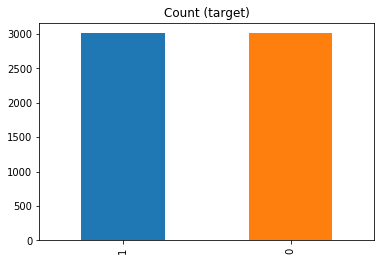

In [41]:
df_class_0_under = df_class_0.sample(count_class_1)
train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(train_under.TARGET.value_counts())

train_under.TARGET.value_counts().plot(kind='bar', title='Count (target)');

In [42]:
y_under = train_under.TARGET
X_norm_under = train_under.drop('TARGET', axis = 1)

In [43]:
results = cross_val_score(dtc, X_norm_under, y_under, cv=kfold, n_jobs=4)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 64.378% (1.809%)


In [44]:
# Cтратегия undersampling ухудшила модель

In [45]:
#Отбор фич

In [46]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.preprocessing import Binarizer, scale

In [47]:
p = 3

In [48]:
X_bin = Binarizer().fit_transform(scale(X))
selectChi2 = SelectPercentile(chi2, percentile=p).fit(X_bin, y)
selectF_classif = SelectPercentile(f_classif, percentile=p).fit(X, y)
chi2_selected = selectChi2.get_support()
chi2_selected_features = [ f for i,f in enumerate(X.columns) if chi2_selected[i]]
print('Chi2 selected {} features {}.'.format(chi2_selected.sum(),
   chi2_selected_features))
f_classif_selected = selectF_classif.get_support()
f_classif_selected_features = [ f for i,f in enumerate(X.columns) if f_classif_selected[i]]
print('F_classif selected {} features {}.'.format(f_classif_selected.sum(),
   f_classif_selected_features))
selected = chi2_selected & f_classif_selected
print('Chi2 & F_classif selected {} features'.format(selected.sum()))
features = [ f for f,s in zip(X.columns, selected) if s]
print (features)

C:\Users\ibelaya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\ibelaya\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 21  22  56  57  58  59  80  84  85 131 132 133 134 155 161 162 179 180
 189 192 220 222 234 238 244 248 261 262 303 307 315 319 327 349] are constant.
  UserWarning)
C:\Users\ibelaya\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Chi2 selected 12 features ['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var5', 'num_var8_0', 'num_var30_0', 'num_var30', 'num_var42', 'saldo_var30', 'var36', 'num_meses_var5_ult3'].
F_classif selected 12 features ['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var4', 'num_var5', 'num_var8_0', 'num_var30', 'num_var35', 'num_var42', 'var36', 'num_meses_var5_ult3'].
Chi2 & F_classif selected 10 features
['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var5', 'num_var8_0', 'num_var30', 'num_var42', 'var36', 'num_meses_var5_ult3']


In [49]:
X_sel = train[features+['TARGET']]

In [50]:
cor_mat = X_sel.corr()

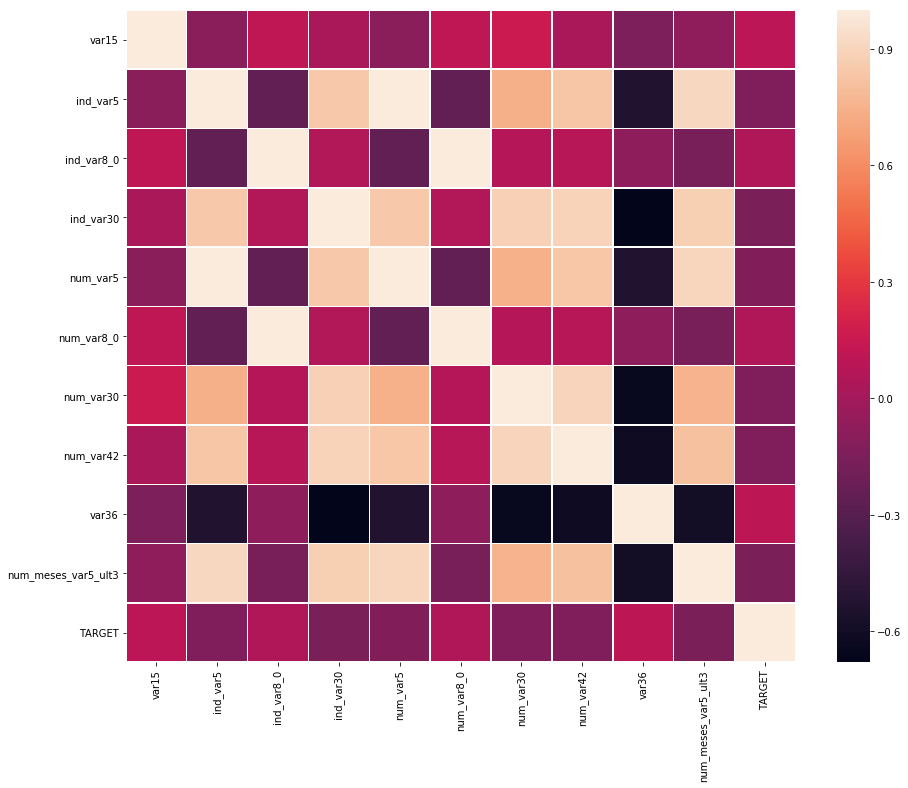

In [51]:
f, ax = plt.subplots(figsize=(15, 12))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat,linewidths=.5, ax=ax);

In [52]:
# Решить задачу бинарной классификации и предсказать удовлетворение клиентов банка (переменная TARGET)

In [53]:
clf_rf = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)

In [54]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_norm, y, test_size=0.3, random_state=0)

In [55]:
# Сделать кросс-валидацию тренировочных данных с использованием подхода K-fold (n_folds=10)

In [56]:
X_train_s, X_test_s, y_train_s, y_test_s

(           var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
 7526   0.999764   0.18            0.000000                 0.000000   
 51929  0.999764   0.43            0.000000                 0.000000   
 46677  0.999764   0.35            0.000000                 0.000000   
 46194  0.999764   0.78            0.000000                 0.000000   
 20190  0.999764   0.74            0.000000                 0.041543   
 10777  0.999764   0.18            0.000000                 0.000000   
 57058  0.999764   0.18            0.000000                 0.000000   
 40266  0.999764   0.19            0.000000                 0.000000   
 75243  0.999764   0.37            0.000000                 0.000000   
 50225  0.999764   0.59            0.000000                 0.000000   
 3463   0.999764   0.32            0.000000                 0.000000   
 57086  0.999764   0.43            0.000000                 0.000000   
 47635  0.999764   0.22            0.000000                 0.00

In [57]:
scores = cross_val_score(clf_rf, X_train_s, y_train_s, cv=10, scoring='accuracy')
print(scores)

print('Среднее значение на кросс-валидации равно: {}'.format(scores.mean()))

[0.96054115 0.96054115 0.96054115 0.96054115 0.96072167 0.96072167
 0.96072167 0.96072167 0.96072167 0.96072167]
Среднее значение на кросс-валидации равно: 0.9606494612929944


In [58]:
clf_rf_1 = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)

In [59]:
scores1 = cross_val_score(clf_rf_1, X_norm_over, y_over, cv=10, scoring='accuracy')
print(scores1)

print('Среднее значение на кросс-валидации равно: {}'.format(scores1.mean()))

[0.78006026 0.76136675 0.76996302 0.77366114 0.7666758  0.76907273
 0.7721545  0.77715381 0.77270237 0.77229147]
Среднее значение на кросс-валидации равно: 0.7715101845362786


In [60]:
clf_rf.fit(X_train_s, y_train_s)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
# Рассчитать Feature Importances для переменных модели

In [62]:
imp = pd.Series(clf_rf.feature_importances_)
imp.sort_values(ascending=False)

1      0.413730
138    0.155753
368    0.100189
182    0.056136
63     0.051054
280    0.024407
24     0.021242
93     0.013785
190    0.012251
12     0.011364
13     0.010465
27     0.009566
16     0.008986
164    0.008561
166    0.008205
17     0.007694
157    0.007342
326    0.006694
89     0.005628
330    0.005504
278    0.004184
331    0.004055
193    0.004047
276    0.003752
0      0.003691
178    0.003656
277    0.003358
325    0.003280
130    0.003243
328    0.002992
         ...   
234    0.000000
224    0.000000
235    0.000000
236    0.000000
237    0.000000
238    0.000000
239    0.000000
242    0.000000
243    0.000000
225    0.000000
223    0.000000
205    0.000000
213    0.000000
206    0.000000
207    0.000000
208    0.000000
209    0.000000
210    0.000000
211    0.000000
212    0.000000
214    0.000000
222    0.000000
215    0.000000
216    0.000000
217    0.000000
218    0.000000
219    0.000000
220    0.000000
221    0.000000
184    0.000000
Length: 369, dtype: floa

In [63]:
y_pred_rf = clf_rf.predict(X_train_s)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(clf_rf.score(X_train_s, y_train_s)))

Accuracy of logistic regression classifier on test set: 0.960649


In [64]:
# Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [65]:
print(classification_report(y_train_s, y_pred_rf))

C:\Users\ibelaya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.96      1.00      0.98     51120
          1       0.00      0.00      0.00      2094

avg / total       0.92      0.96      0.94     53214



In [66]:
# Построить Confusion Matrix для ваших результатов

In [67]:
confusion_matrix = confusion_matrix(y_train_s, y_pred_rf)
print(confusion_matrix)

[[51120     0]
 [ 2094     0]]


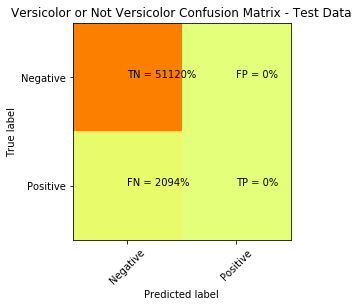

In [68]:
plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j])+'%')
plt.show()